In [8]:
%pip install prophet
%pip install matplotlib
%pip install pandas

%matplotlib inline

from prophet import Prophet
import pandas as pd
import logging
import warnings

logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('numexpr').setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

  Using cached prophet-1.1.6-py3-none-macosx_11_0_arm64.whl.metadata (3.5 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached holidays-0.63-py3-none-any.whl.metadata (26 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-macosx_11_0_arm64.whl (8.2 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
Using cached holidays-0.63-py3-none-any.whl (1.2 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


19:14:40 - cmdstanpy - INFO - Chain [1] start processing
19:14:40 - cmdstanpy - INFO - Chain [1] done processing


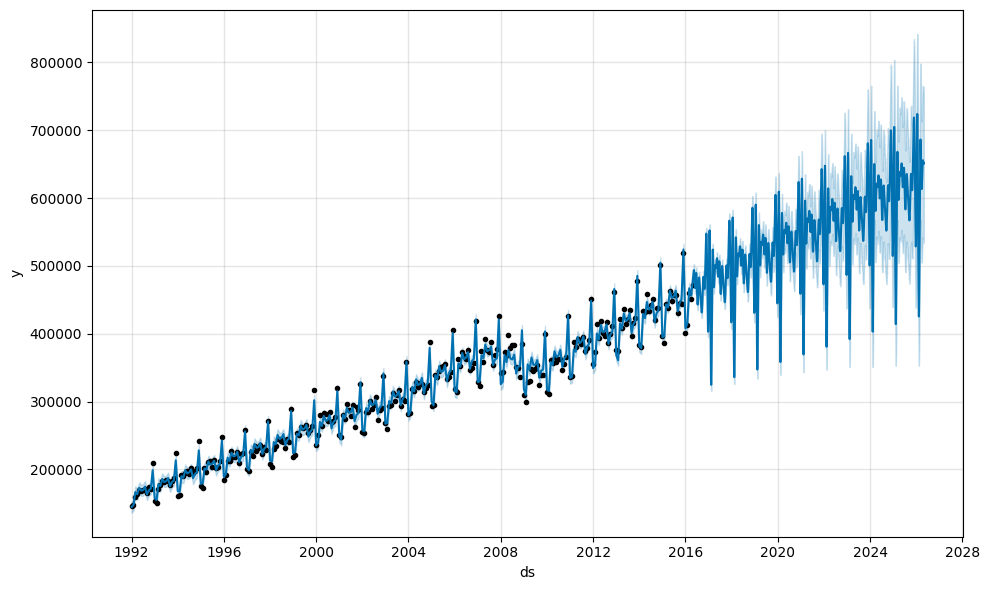

In [ ]:
df = pd.read_csv('data/example_retail_sales.csv')
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=3652)
forecast = m.predict(future)
fig = m.plot(forecast)

19:06:56 - cmdstanpy - INFO - CmdStan start processing
19:06:56 - cmdstanpy - INFO - Chain [1] start processing
19:06:56 - cmdstanpy - INFO - Chain [2] start processing
19:06:56 - cmdstanpy - INFO - Chain [3] start processing
19:06:56 - cmdstanpy - INFO - Chain [4] start processing
19:07:00 - cmdstanpy - INFO - Chain [3] done processing
19:07:00 - cmdstanpy - INFO - Chain [2] done processing
19:07:00 - cmdstanpy - INFO - Chain [4] done processing
19:07:00 - cmdstanpy - INFO - Chain [1] done processing
19:07:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exc

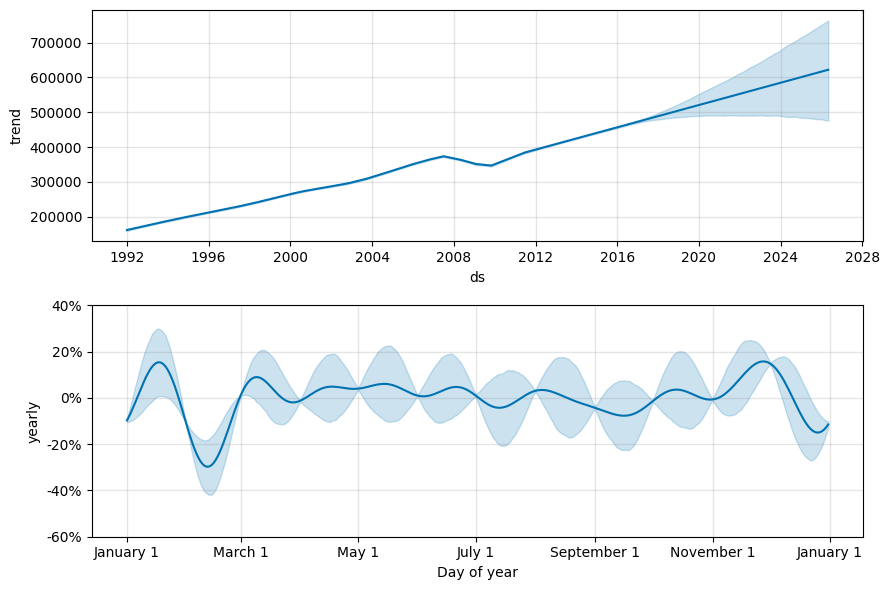

In [13]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(df, show_progress=False)
fcst = m.predict(future)
fig = m.plot_components(fcst)

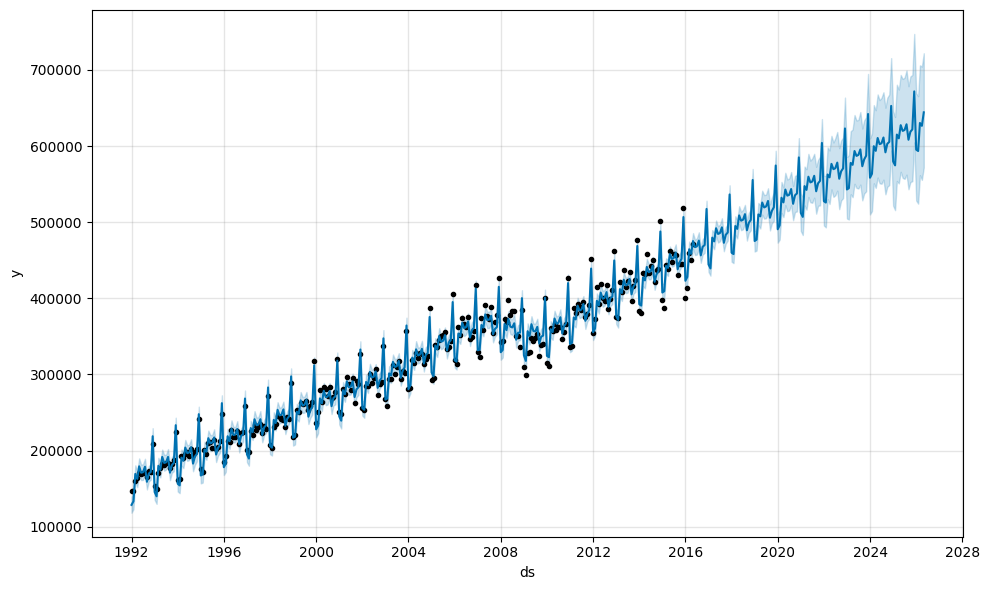

In [12]:
future = m.make_future_dataframe(periods=120, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)